### `Import the libraries`

In [52]:
## major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


## sklearn -- preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, PolynomialFeatures,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
# detect outliers
from datasist.structdata import detect_outliers

## sklearn -- metrics
from sklearn.metrics import mean_squared_error,r2_score

## sklearn -- models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet

### `Reading the Dataset and Look at the big picture`

In [53]:
df=pd.read_csv("StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [55]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [56]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [57]:
df.isna().sum().sort_values(ascending=False) 

Parental_Education_Level      90
Teacher_Quality               78
Distance_from_Home            67
Hours_Studied                  0
Access_to_Resources            0
Parental_Involvement           0
Attendance                     0
Extracurricular_Activities     0
Motivation_Level               0
Internet_Access                0
Previous_Scores                0
Sleep_Hours                    0
Family_Income                  0
Tutoring_Sessions              0
School_Type                    0
Peer_Influence                 0
Learning_Disabilities          0
Physical_Activity              0
Gender                         0
Exam_Score                     0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df = df.dropna()
df.isna().sum().sort_values(ascending=False) 

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [61]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [62]:
df.duplicated().sum()

np.int64(0)

# EDA

In [63]:
numerical_features=df.select_dtypes(include="number").columns.to_list()
caterogical_features=df.select_dtypes(exclude="number").columns.to_list()

In [64]:
numerical_features

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [65]:
caterogical_features

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

## univariate analysis

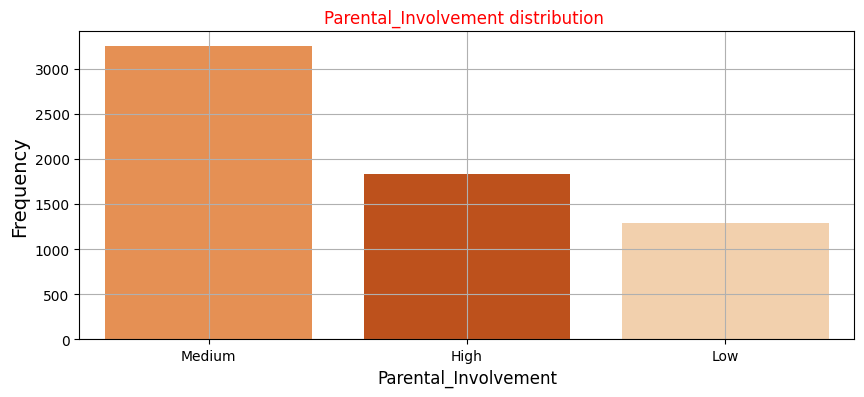

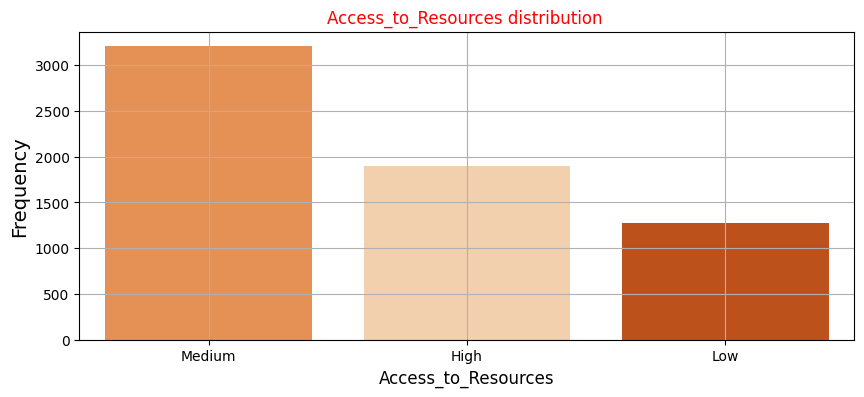

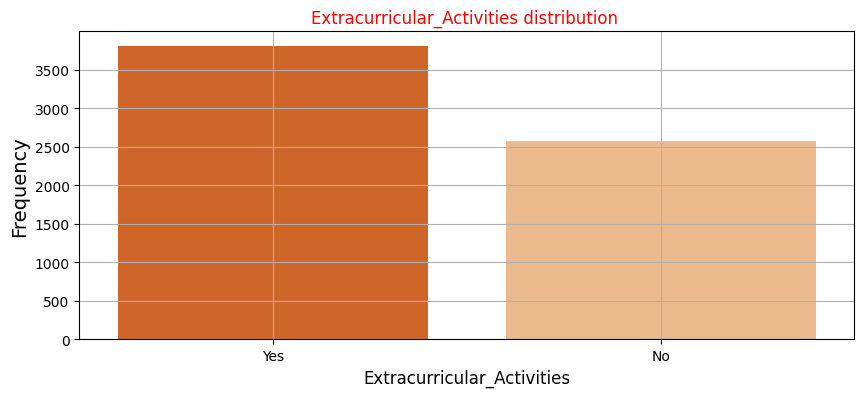

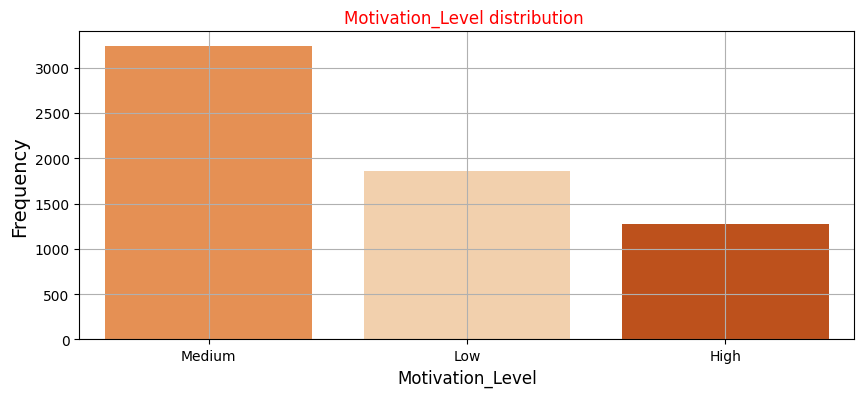

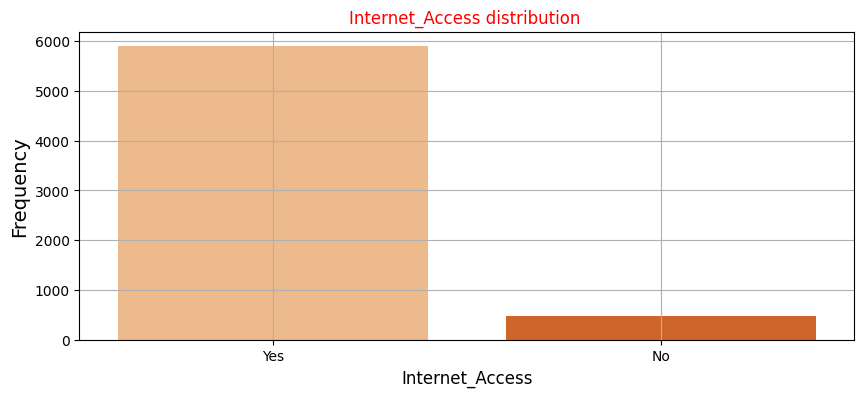

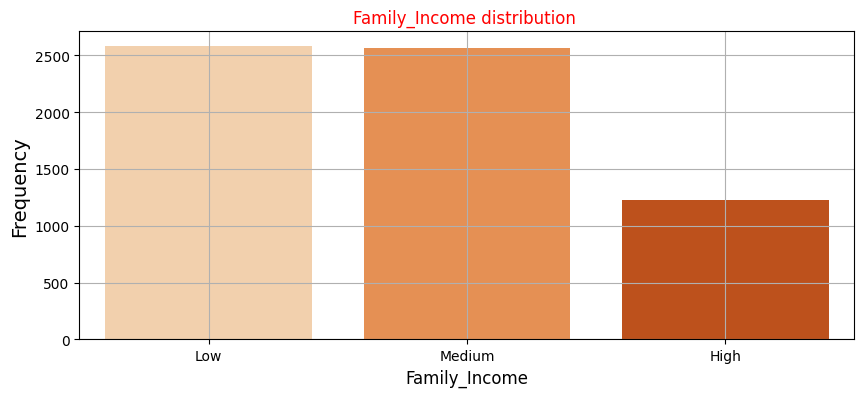

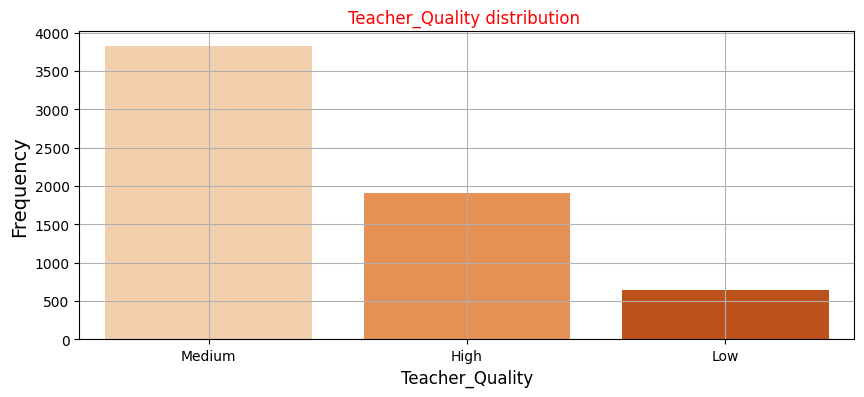

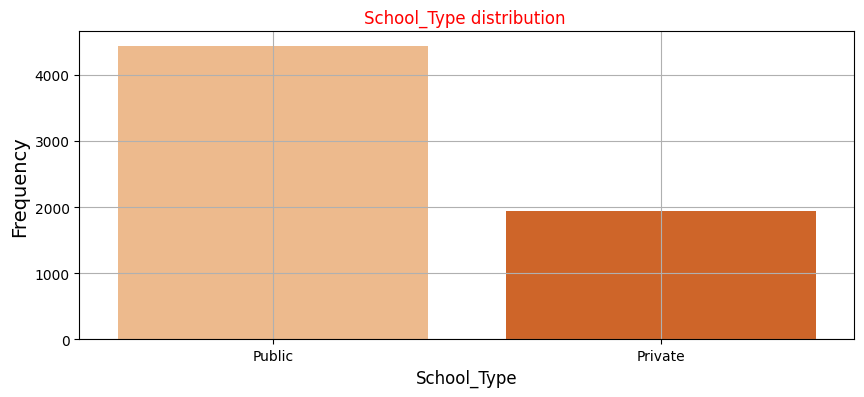

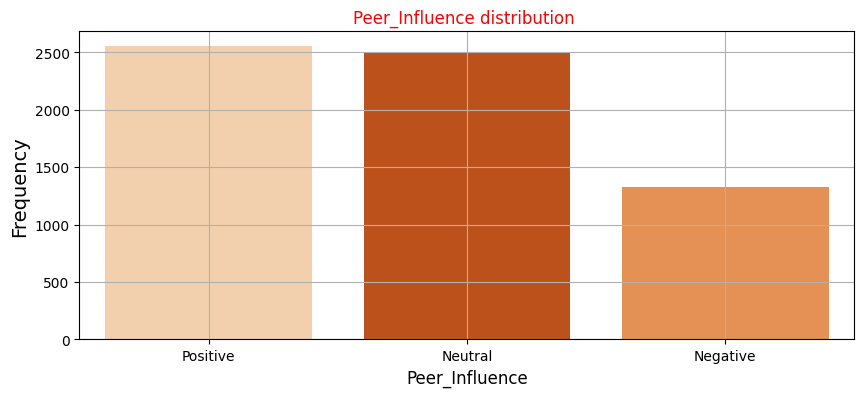

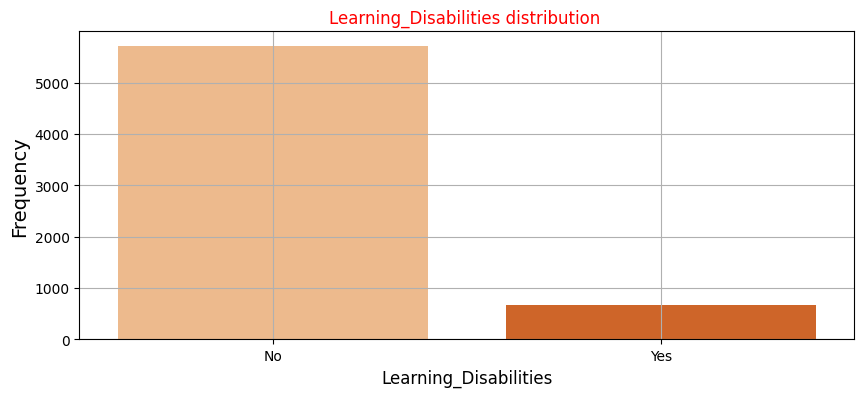

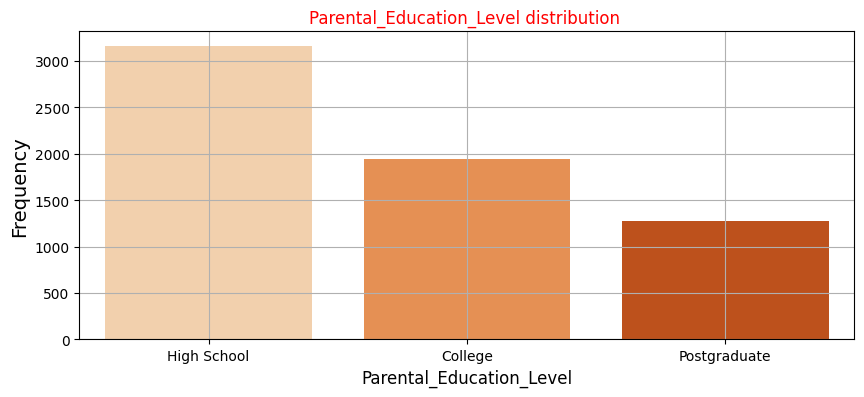

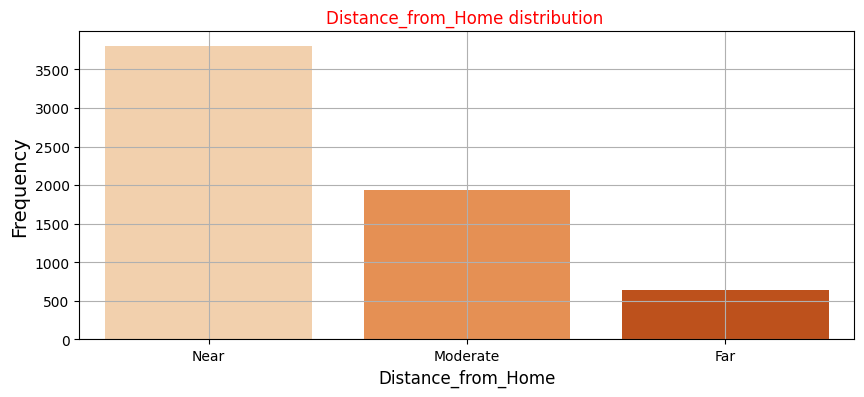

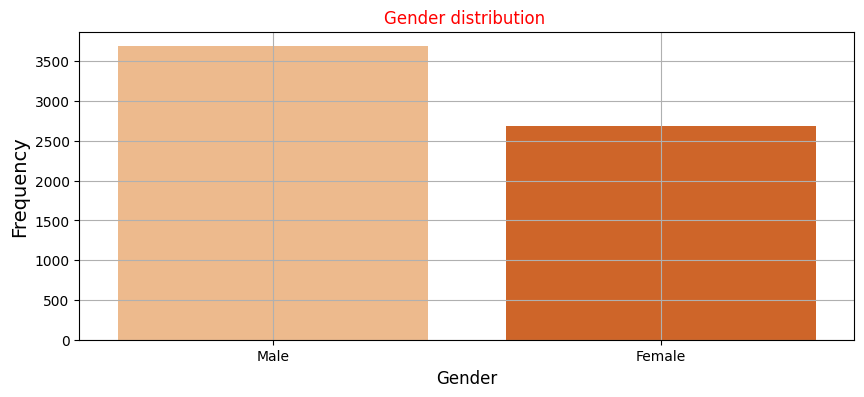

In [66]:
for feature in caterogical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=feature, hue=feature, palette="Oranges", order=df[feature].value_counts().index, legend=False)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

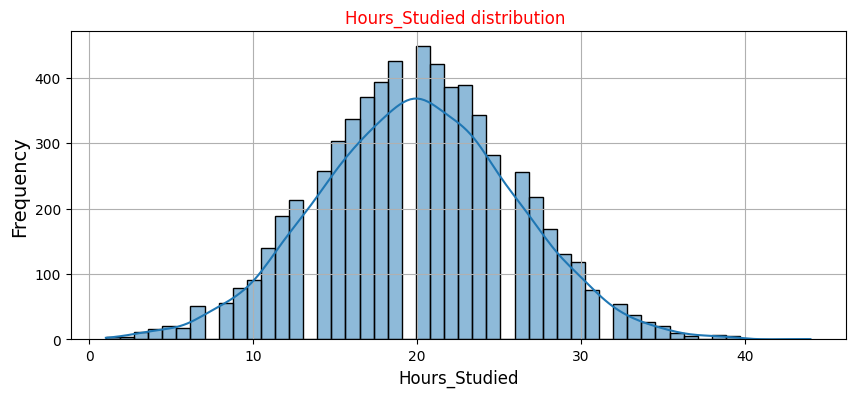

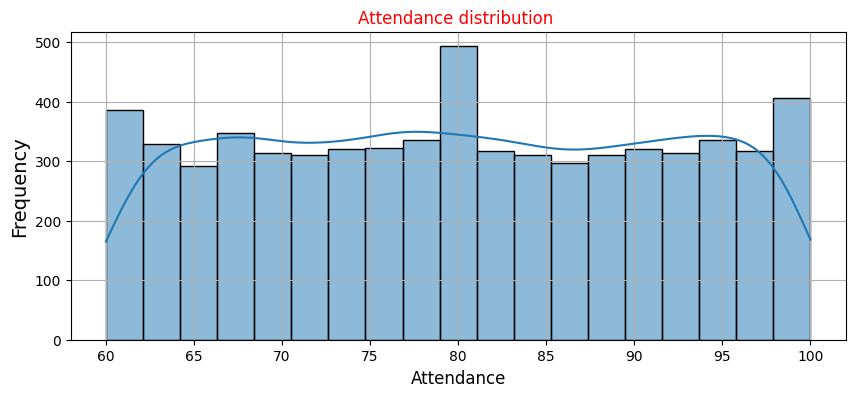

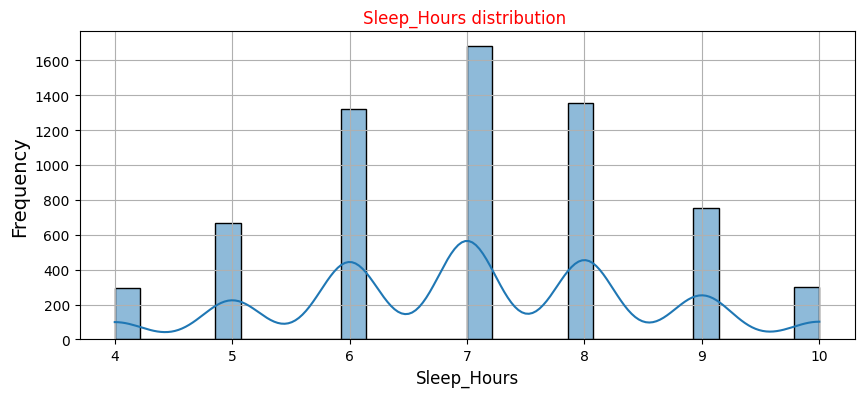

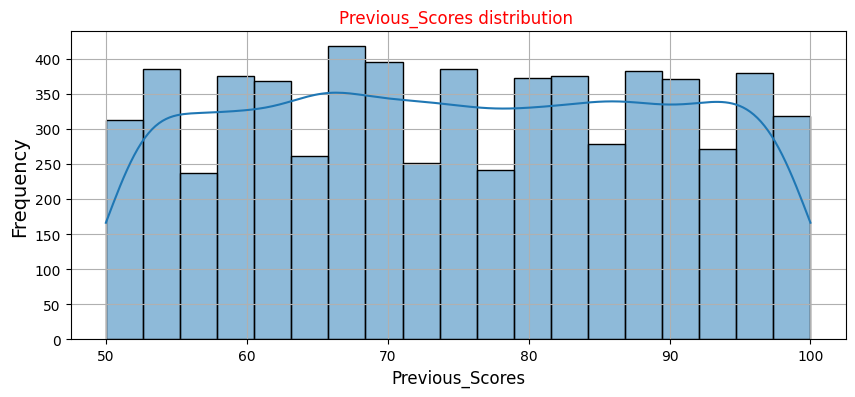

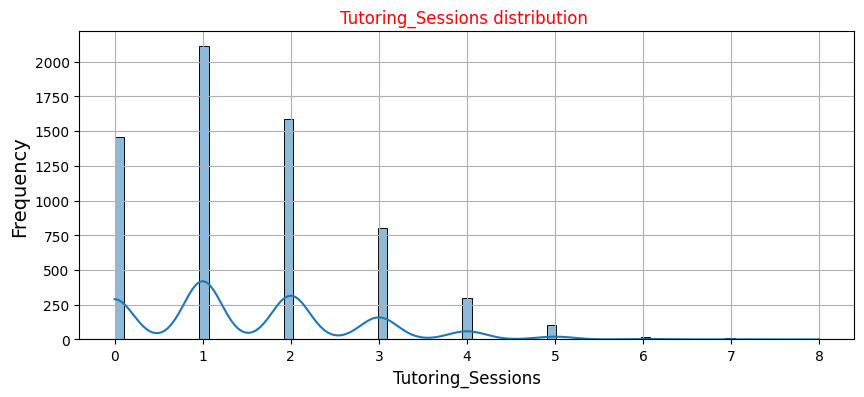

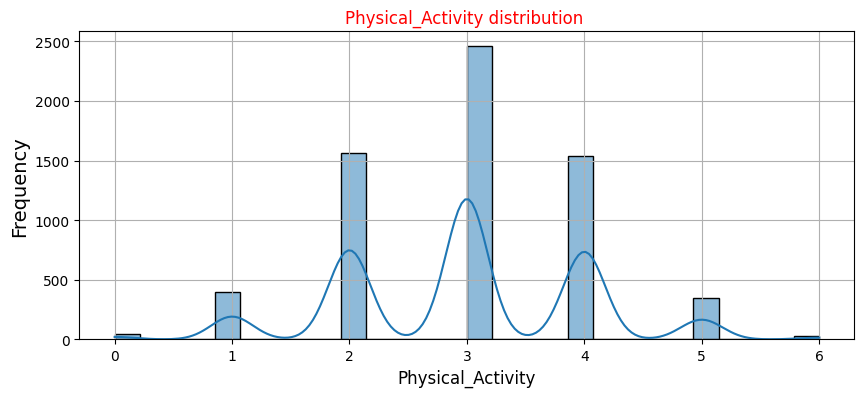

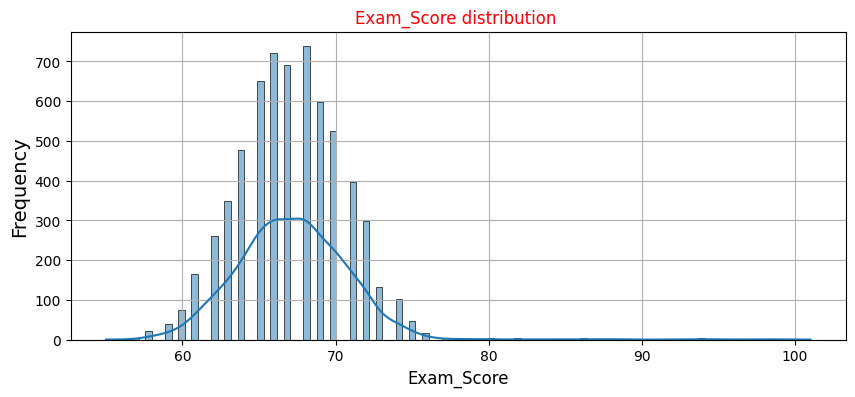

In [67]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


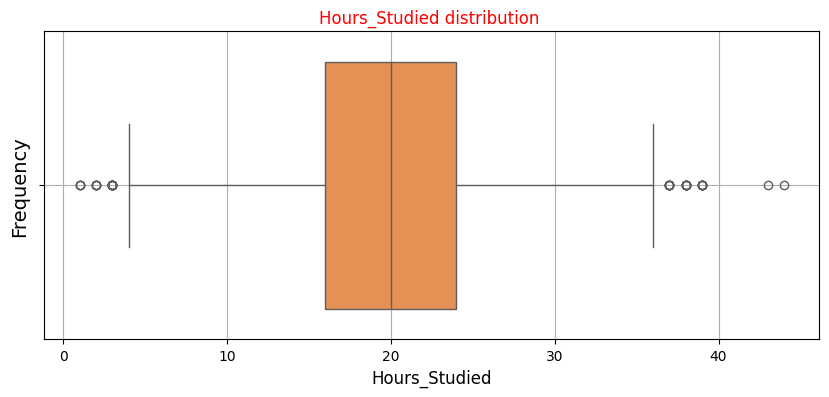

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


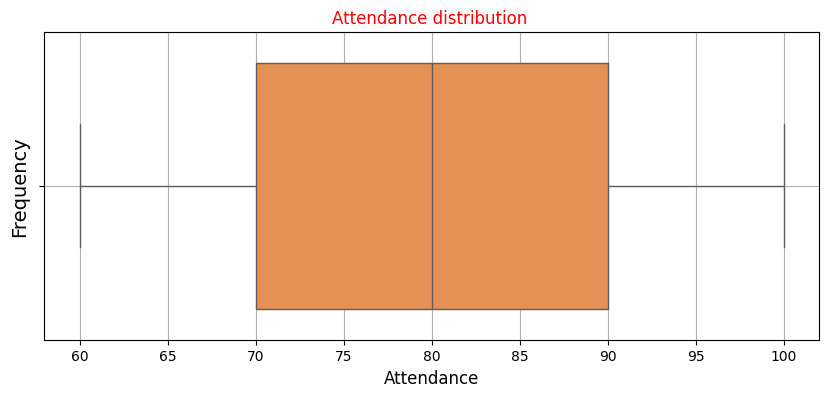

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


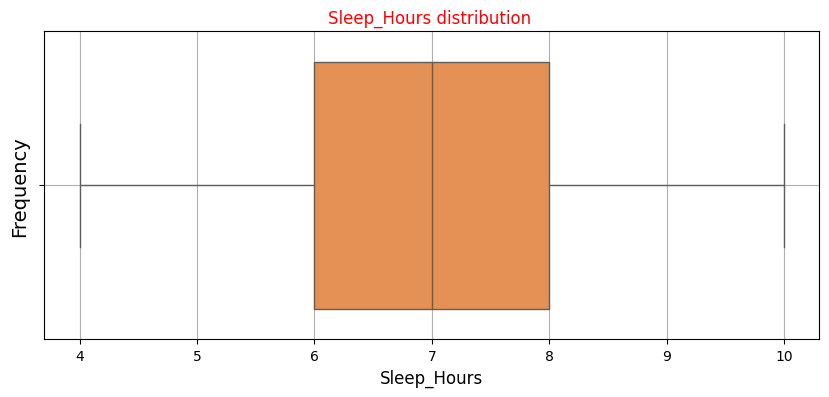

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


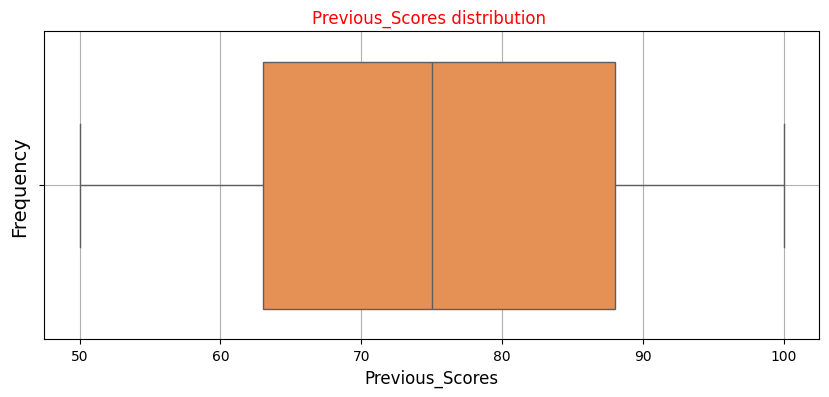

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


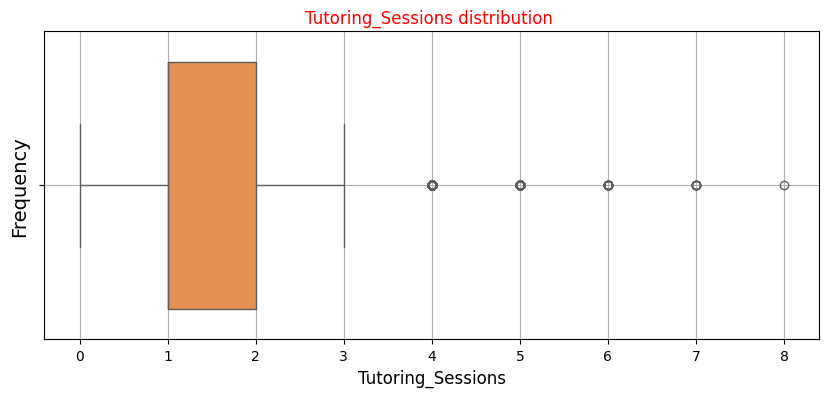

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


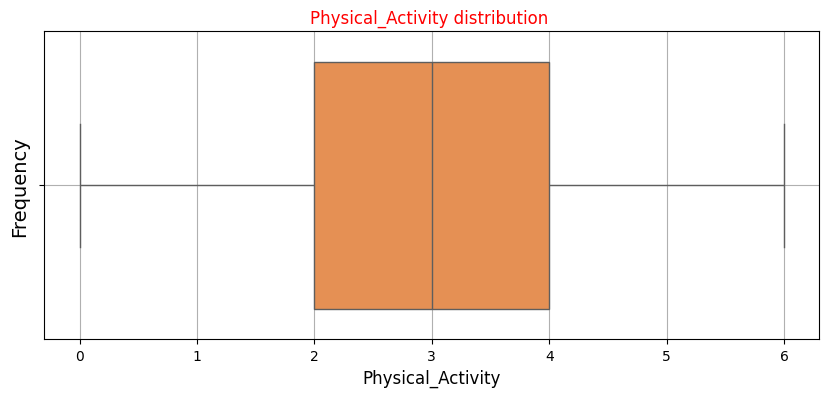

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


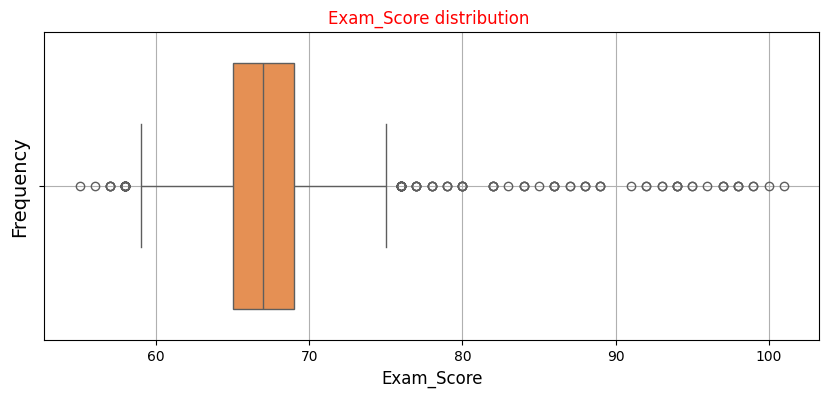

In [68]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df,x=feature,palette="Oranges")
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

* we have some outliers in numerical features`

In [69]:
## retrun outliers indecies
indecies_outliers = detect_outliers(data=df, n=0, features=numerical_features)
len(indecies_outliers)

542

In [70]:
## drop them all -- a strategy
df.drop(index=indecies_outliers, inplace=True, axis=0)
df

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\2937962511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=indecies_outliers, inplace=True, axis=0)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


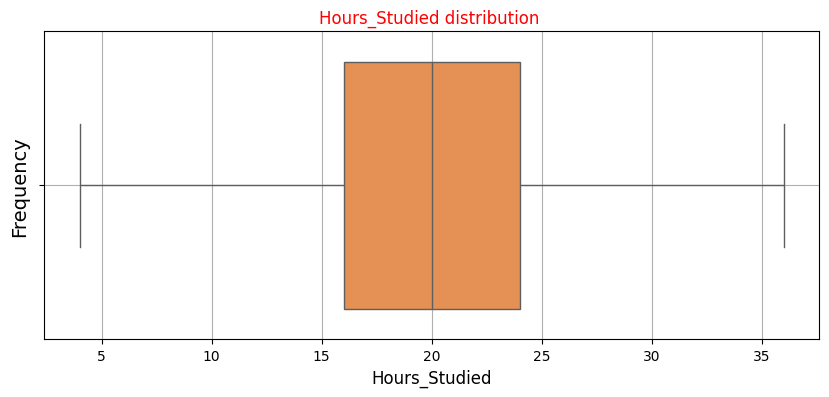

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


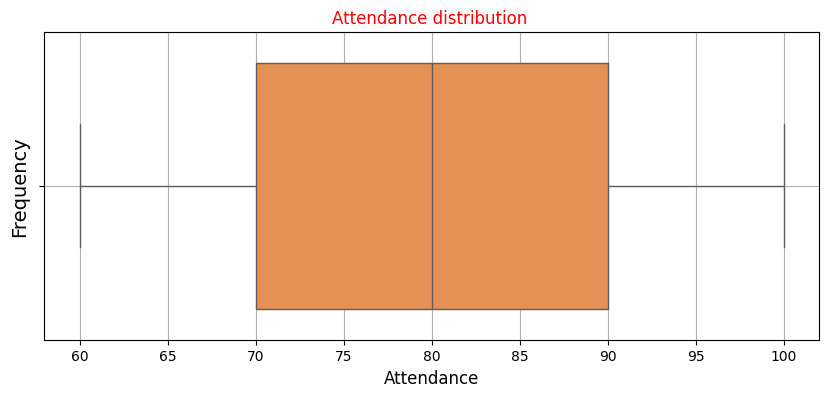

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


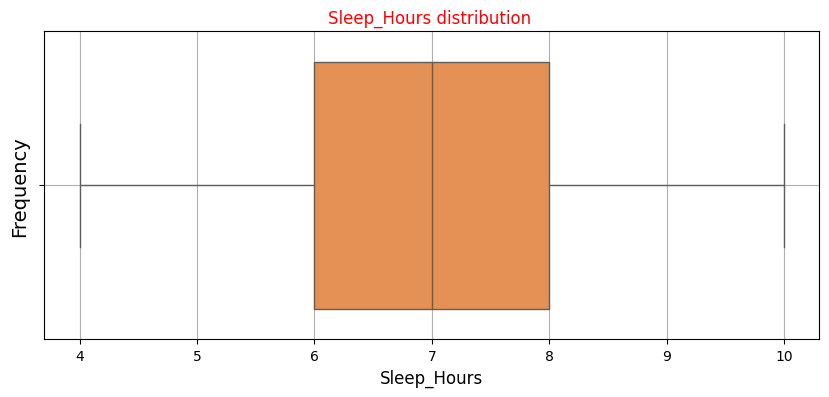

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


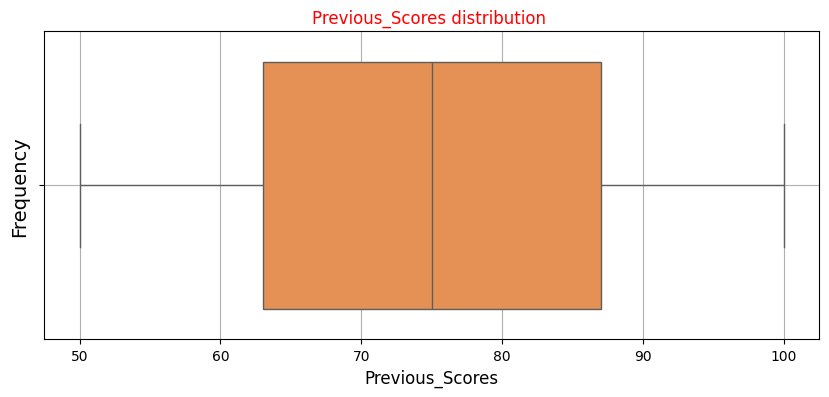

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


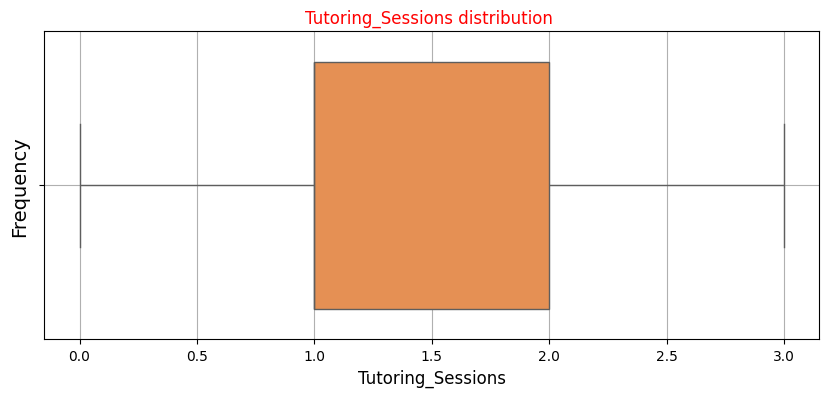

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


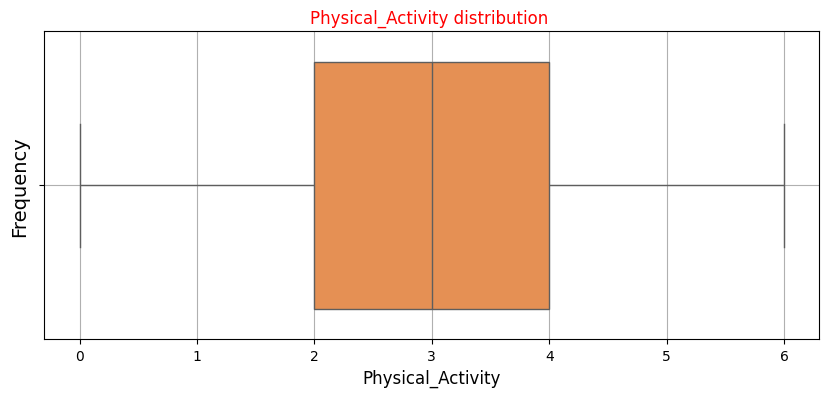

C:\Users\moham\AppData\Local\Temp\ipykernel_4932\683582973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette="Oranges")


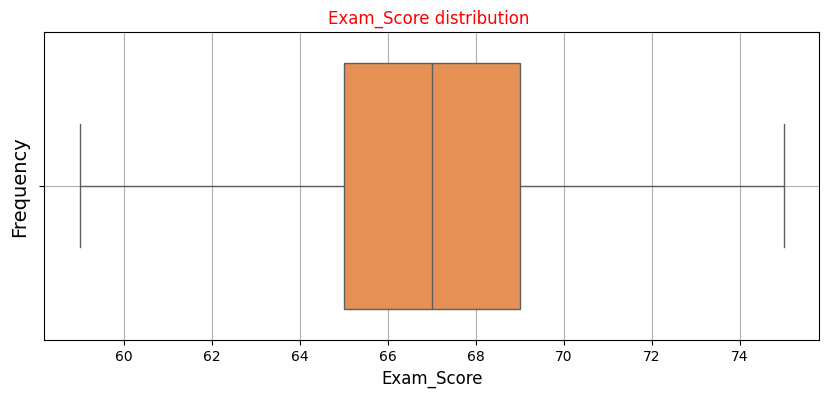

In [71]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df,x=feature,palette="Oranges")
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

# Spliting data 

In [72]:
## split to faetures and target
X = df.drop(columns=['Exam_Score'], axis=1)   ## faetures
y = df['Exam_Score']   ## traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (4085, 19)
y_train.shape 	 (4085,)
************************************************************
X_test.shape 	 (1751, 19)
y_test.shape 	 (1751,)


# Data preprocessing 

In [73]:
## Get the Numerical and Catgeorcial columns
num_cols = X_train.select_dtypes(include='number').columns.tolist()
categ_cols = X_train.select_dtypes(exclude='number').columns.tolist()

print('Numerical cols \t', num_cols)
print('Categorical cols \t', categ_cols)

Numerical cols 	 ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
Categorical cols 	 ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [74]:
categ_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(categ_cols)),
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(sparse_output=False,drop="first"))
])
num_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(num_cols)),
    ("impute",SimpleImputer(strategy="mean")),
    ("tranform",PowerTransformer(standardize=True))
])
all_pipe=FeatureUnion(transformer_list=[
    ("caterogical_pipline",categ_pipe),
    ("numerical_pipline",num_pipe)
])
X_train=all_pipe.fit_transform(X_train)
X_test=all_pipe.transform(X_test)

In [75]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.519896,0.604811,-0.723319,1.566437,1.553461,0.025549
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,-0.679626,1.612116,-1.400498,0.571099,-1.430939,1.018177
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-0.679626,-1.596118,0.640481,-0.046938,0.760649,0.025549
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.203028,-0.963670,-0.042860,0.974075,0.760649,-1.908952
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.861645,1.111885,2.014625,-1.046257,-0.185645,0.025549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.006513,-0.608359,-2.073864,-1.046257,-0.185645,0.025549
4081,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.679626,-0.257112,2.014625,-0.398105,-0.185645,0.025549
4082,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.519896,-1.232989,-0.723319,0.366979,-0.185645,0.025549
4083,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.006513,-0.963670,-0.042860,0.091907,-0.185645,0.025549


In [76]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,-1.540581,1.195718,2.014625,-0.973136,-0.185645,0.025549
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.177748,0.262681,-0.042860,-0.755483,0.760649,-0.951793
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.177748,0.604811,-1.400498,0.229870,-0.185645,-0.951793
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.177748,-1.687657,-0.042860,-1.193389,-0.185645,0.025549
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.006513,0.434169,-0.723319,-1.193389,-1.430939,-0.951793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.164835,0.859237,-0.042860,0.435222,0.760649,-0.951793
1747,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.519896,0.262681,0.640481,0.706185,0.760649,-0.951793
1748,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.348874,1.279364,-0.723319,-0.398105,-0.185645,0.025549
1749,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.690818,-1.053165,-0.723319,-0.540279,-1.430939,0.025549


In [77]:
pd.DataFrame(y_train)

,Exam_Score
2618,72
1300,69
2596,62
4460,69
3150,70
...,...
4278,64
5870,64
5910,66
6089,67


In [78]:
pd.DataFrame(y_test)

,Exam_Score
3749,66
6158,68
3037,69
1745,60
4742,65
...,...
6462,69
3690,65
149,72
2211,60


# Buliding Models

#### `Linear Regression`

In [79]:
## intialize 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)   ## train


## Predict
y_pred_train_lin = lin_reg.predict(X_train)    ## you have the true value for train data (y_train)
y_pred_test_lin = lin_reg.predict(X_test)       ## you have the true value for train data (y_test)

In [80]:
## Evaluate Model USING MSE
mse_train_lin = mean_squared_error(y_train, y_pred_train_lin)
mse_test_lin = mean_squared_error(y_test, y_pred_test_lin)

print(f'MSE of Training Dataset using LinearRegression Model is: {mse_train_lin:.3f}')
print(f'MSE of Testing Dataset using LinearRegression Model is: {mse_test_lin:.3f}')    

MSE of Training Dataset using LinearRegression Model is: 0.104
MSE of Testing Dataset using LinearRegression Model is: 0.105


In [81]:
## Evaluate Model USING R² Score
Score_train = r2_score(y_train, y_pred_train_lin)
Score_test = r2_score(y_test, y_pred_test_lin)

print(f"R² Score:{Score_train:}")
print(f"R² Score:{Score_test:}")

R² Score:0.990204118362339
R² Score:0.9895705012443785


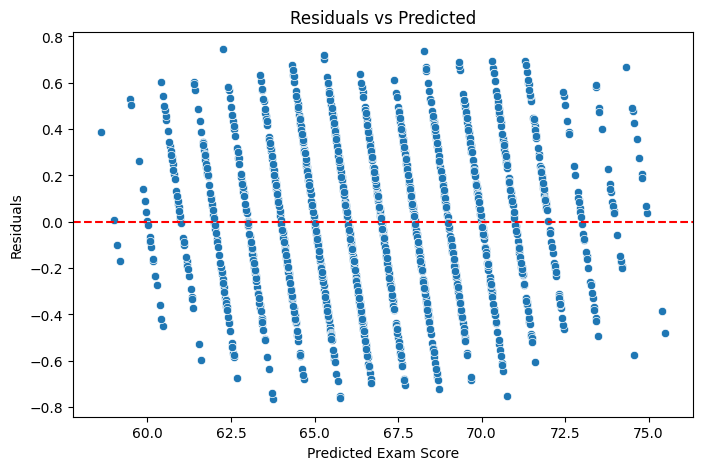

In [82]:
residuals = y_test - y_pred_test_lin

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test_lin, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

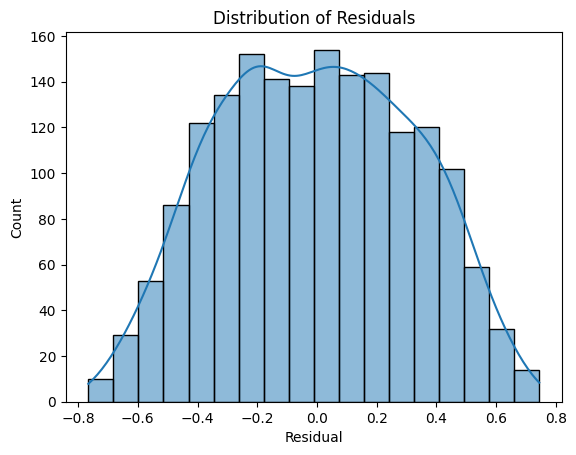

In [83]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()

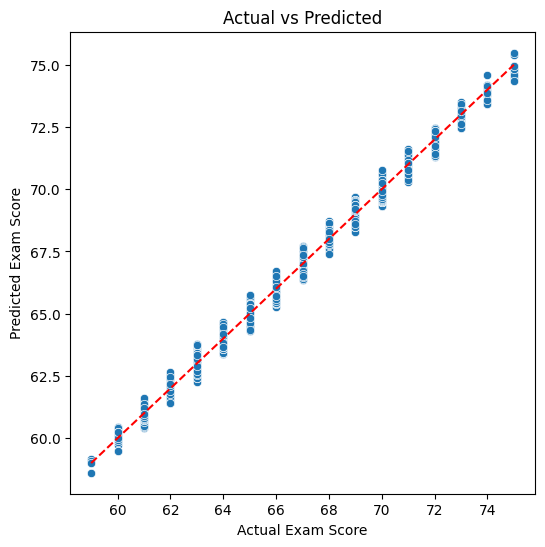

In [84]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_test_lin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted")
plt.show()

# Bonus

### `2. Polynomail Regression`

In [96]:
poly = PolynomialFeatures(degree=2, include_bias=False)
## fitting and transforming
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


## Ready for Model ---> Using LinearRegression
## intialize 
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)   ## train


## Predict
y_pred_train_poly = poly_reg.predict(X_train_poly)    ## you have the true value for train data (y_train)
y_pred_test_poly = poly_reg.predict(X_test_poly)       ## you have the true value for train data (y_test)

In [97]:
## Evaluate Model USING MSE
mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

print(f'MSE of Training Dataset using PolynomialRegression Model is: {mse_train_poly:.3f}')
print(f'MSE of Testing Dataset using PolynomialRegression Model is: {mse_test_poly:.3f}')    

MSE of Training Dataset using PolynomialRegression Model is: 0.091
MSE of Testing Dataset using PolynomialRegression Model is: 0.109


In [98]:
## Evaluate Model USING R² Score
print("R² Score:", r2_score(y_train, y_pred_train_poly))
print("R² Score:", r2_score(y_test, y_pred_test_poly))

R² Score: 0.991440798621124
R² Score: 0.9891171773414534


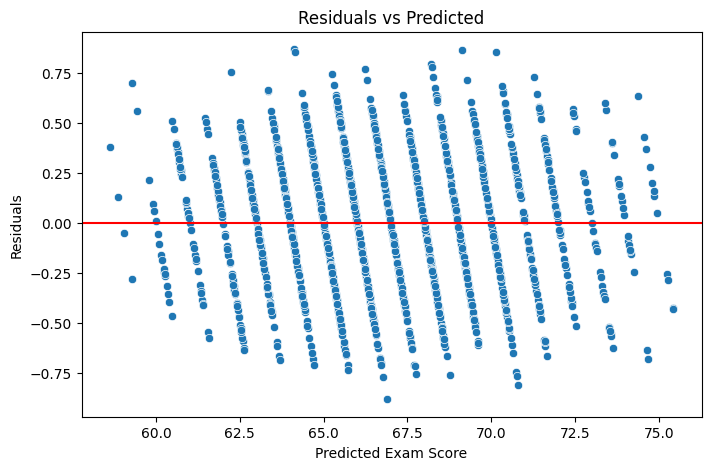

In [99]:
residuals = y_test - y_pred_test_poly

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test_poly, y=residuals)
plt.axhline(0, color='red', linestyle='-')
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

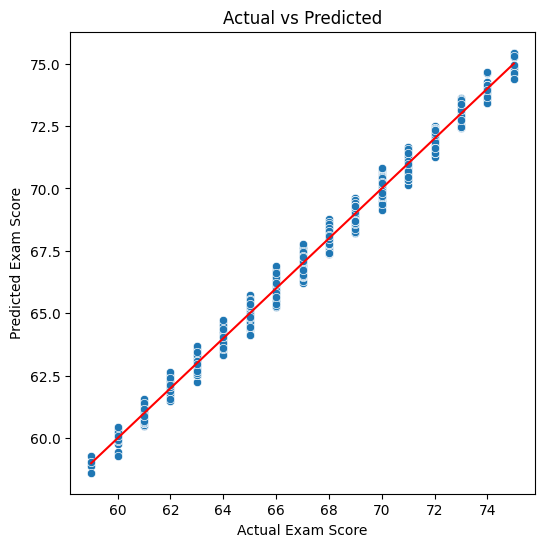

In [101]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_test_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted")
plt.show()

based on these results the normal linear regression model is better than the polynomial regression in this task